In [12]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

In [13]:
model = nn.Sequential (
    nn.Linear (2, 4),
    nn.Linear (4, 1)
)

In [14]:
x = torch.tensor ([1, 2], dtype=torch.float)
o = model (x)
o, o.shape

(tensor([-0.6599], grad_fn=<ViewBackward0>), torch.Size([1]))

In [15]:
x.shape # (1, 3), w.shape (3, 5), o.shape (1, 5)

torch.Size([2])

In [16]:
# x @ W.T + b

In [17]:
x = torch.tensor ([[1, 2], [3, 4], [9, 10]], dtype=torch.float)
x, x.shape

(tensor([[ 1.,  2.],
         [ 3.,  4.],
         [ 9., 10.]]),
 torch.Size([3, 2]))

In [18]:
w1 = torch.randn ((4, 2))
w1, w1.shape

(tensor([[ 0.1084,  1.8340],
         [-0.0925, -1.5476],
         [-0.8943,  0.7725],
         [-0.4025,  0.2742]]),
 torch.Size([4, 2]))

In [25]:
b1 = torch.randn ((1, 4))
b1, b1.shape

(tensor([[-0.1516, -0.9891, -1.7450,  0.7716]]), torch.Size([1, 4]))

In [26]:
o1 = x @ w1.T + b1
o1, o1.shape

(tensor([[ 2.3608, -0.1311, -2.7641,  3.3749],
         [ 6.4112,  0.2422, -3.1946,  6.9646],
         [18.5621,  1.3619, -4.4861, 17.7334]]),
 torch.Size([3, 4]))

In [27]:
w2 = torch.randn ((1, 4))
w2, w2.shape

(tensor([[ 1.2263, -0.3755,  0.3699,  0.4583]]), torch.Size([1, 4]))

In [28]:
b2 = torch.randn ((1, 1))
b2, b2.shape

(tensor([[-1.4960]]), torch.Size([1, 1]))

In [29]:
o1 @ w2.T + b2

tensor([[ 1.9724],
        [ 8.2850],
        [27.2228]])

In [33]:
import pandas as pd
from kan import *
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
iris = load_iris ()

In [4]:
df = pd.DataFrame (data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [5]:
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
0          0  
1          0  
2          0  
3          0  
4          0  
..       ...  
145        2  
146        2  
147        2  
148        2  
149        2  

[150 rows x 5 columns]

In [202]:
class KANIris (nn.Module):
    def __init__ (self):
        super (KANIris, self).__init__ ()
        
        self.k1 = KANLayer (in_dim=4, out_dim=4, base_fun=nn.ReLU (), k=10)
        self.k2 = KANLayer (in_dim=4, out_dim=3, base_fun=nn.ReLU (), k=10)
    
    def forward (self, x):
        o = self.k1 (x)[0]
        o = self.k2 (o)[0]
        return o

In [203]:
class MLPIris (nn.Module):
    def __init__ (self):
        super (MLPIris, self).__init__ ()
        
        self.fc1 = nn.Linear (4, 10)
        self.fc2 = nn.Linear (10, 20)
        self.fc3 = nn.Linear (20, 3)
    
    def forward (self, x):
        o = F.relu (self.fc1 (x))
        o = F.relu (self.fc2 (o))
        o = self.fc3 (o)
        return o

In [204]:
model = KANIris ()
# model = MLPIris ()

In [205]:
optim = torch.optim.SGD (model.parameters (), lr=0.01)
criterion = nn.CrossEntropyLoss ()

In [206]:
X = df.iloc[:, :-1].values
yhat = df.iloc[:, -1].values

In [207]:
X_train, X_test, y_train, y_test = train_test_split (X, yhat, test_size=0.3)

In [208]:
epochs = 50

model.train ()
for e in range (epochs):
    train_loss = 0.0
    
    for (x, y) in zip (X_train, y_train):
        x = torch.tensor (x, dtype=torch.float).unsqueeze (0)
        y = torch.tensor (y, dtype=torch.long).unsqueeze (0)
        out = model (x)
    
        optim.zero_grad ()
        loss = criterion (out, y)

        loss.backward ()
        optim.step ()
        
        train_loss += loss.item()
    
    print(f"Epoch {e+1}, Training Loss: {train_loss / len(X_train)}")

Epoch 1, Training Loss: 1.0013822192237491
Epoch 2, Training Loss: 0.8357579864206768
Epoch 3, Training Loss: 0.7218294296945844
Epoch 4, Training Loss: 0.6304026141053154
Epoch 5, Training Loss: 0.5620476424694061
Epoch 6, Training Loss: 0.5071799902688889
Epoch 7, Training Loss: 0.4614535519054958
Epoch 8, Training Loss: 0.42306862941810064
Epoch 9, Training Loss: 0.3909821325824374
Epoch 10, Training Loss: 0.3637860915490559
Epoch 11, Training Loss: 0.3361334460831824
Epoch 12, Training Loss: 0.31725241016773953
Epoch 13, Training Loss: 0.3001278968794005
Epoch 14, Training Loss: 0.28701768084650947
Epoch 15, Training Loss: 0.2755608290788673
Epoch 16, Training Loss: 0.26564665007449334
Epoch 17, Training Loss: 0.25744972619272416
Epoch 18, Training Loss: 0.2528696738715683
Epoch 19, Training Loss: 0.26847141324764207
Epoch 20, Training Loss: 0.24410578196956997
Epoch 21, Training Loss: 0.23044176883995532
Epoch 22, Training Loss: 0.23674237038053217
Epoch 23, Training Loss: 0.23103

In [209]:
model.eval ()
with torch.no_grad ():
    total = 0
    correct = 0
    test_acc = 0.0
    
    for (x, y) in zip (X_test, y_test):
        x = torch.tensor (x, dtype=torch.float).unsqueeze (0)
        y = torch.tensor (y, dtype=torch.long).unsqueeze (0)
        out = model (x)
        
        _, predicted = torch.max (out, 1)

        total += y.size (0)
        correct += (predicted == y).sum ().item ()

    test_acc = correct / total
    print(f"Test Accuracy: {test_acc * 100:.2f}%")

Test Accuracy: 97.78%


In [ ]:
## KANIris (97.78%) (lr=0.01, epochs=50, arch=(4, 6, 3))
## MLPIris (100%) (lr=0.01, epochs=50, arch=(4, 10, 20, 3))
## KANIris (97.78%) (lr=0.01, epochs=50, arch=(4, 4, 3))

In [19]:
import os
import torchvision
from PIL import Image
import torchvision.transforms as transforms

In [20]:
transform = transforms.Compose ([
    transforms.Resize ((256, 256)),
    transforms.ToTensor ()
])

In [21]:
dataset = '../vit-cat-dog/'
class_map = {
    'dogs': 0,
    'cats': 1
}

In [22]:
images = list ()
labels = list ()

In [23]:
for label in os.listdir (dataset):
    if label[0] == '.': 
        continue
        
    for image in os.listdir (os.path.join (dataset, label)):
        if image[0] == '.': 
            continue
        
        image_path = os.path.join (dataset, label, image)
        
        img = Image.open (image_path)
        img_tensor = transform (img)
        
        images.append (img_tensor)
        labels.append (torch.tensor (class_map[label]))

In [24]:
images = torch.stack (images)
labels = torch.tensor (labels, dtype=torch.float)

In [25]:
images.shape, labels.shape

(torch.Size([8104, 3, 256, 256]), torch.Size([8104]))

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split (images, labels, test_size=0.3)

In [40]:
class KANDogCat (nn.Module):
    def __init__ (self):
        super (KANDogCat, self).__init__ ()
        
        self.conv1 = nn.Sequential (
            nn.Conv2d (3, 64, kernel_size=3, stride=1),
            nn.ReLU (),
            nn.MaxPool2d ((2, 2))
        )
            
        self.conv2 = nn.Sequential (
            nn.Conv2d (64, 128, kernel_size=3, stride=2),
            nn.ReLU (),
            nn.MaxPool2d ((2, 2))
        )
            
        self.conv3 = nn.Sequential (
            nn.Conv2d (128, 512, kernel_size=3, stride=2),
            nn.ReLU (),
            nn.MaxPool2d ((3, 3))
        )
        
        self.norm = nn.BatchNorm2d (512)
        
        self.fc1 = nn.Linear (512 * 5 * 5, 8124)
        self.fc2 = nn.Linear (8124, 2048)
        self.classify = nn.Linear (2048, 1)
        
    def forward (self, x):
        b = x.shape[0]
        
        x = F.relu (self.conv1 (x))
        x = F.relu (self.conv2 (x))
#         x = F.relu (self.conv3 (x))
        x = self.norm (x)
        x = x.view (b, -1)
        x = self.fc1 (x)
        x = self.fc2 (x)
        o = self.classify (x)
            
        return o

In [41]:
x = X_train[0].unsqueeze (0)
x.shape

torch.Size([1, 3, 256, 256])

In [42]:
sequential = nn.Sequential (
    nn.Conv2d (3, 64, kernel_size=3, stride=1),
    nn.MaxPool2d ((2, 2)),
    nn.Conv2d (64, 128, kernel_size=3, stride=2),
    nn.MaxPool2d ((2, 2)),
    nn.Conv2d (128, 512, kernel_size=3, stride=2),
    nn.MaxPool2d ((3, 3))
)

In [43]:
o = sequential (x)
o.shape

torch.Size([1, 512, 5, 5])

In [44]:
model = KANDogCat ()
model

KANDogCat(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(128, 512, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(3, 3), stride=(3, 3), padding=0, dilation=1, ceil_mode=False)
  )
  (norm): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=12800, out_features=8124, bias=True)
  (fc2): Linear(in_features=8124, out_features=2048, bias=True)
  (classify): Linear(in_features=2048, out_features=1, bias=True)
)

In [45]:
epochs = 10
lr = 0.005

In [46]:
criterion = nn.BCEWithLogitsLoss ()
optimizer = torch.optim.SGD (model.parameters (), lr=0.001)

In [ ]:
ix = torch.randint (0, X_train.shape[0], (256,))
model (X_train[ix])

In [34]:
iteration = list ()
losses = list ()

for e in range (epochs):
    ix = torch.randint (0, X_train.shape[0], (256,))
    
    inputs = X_train[ix]
    y_true = y_train[ix].to (torch.float)

    optimizer.zero_grad ()
    y_pred = model (inputs)
    loss = criterion (y_pred.squeeze (), y_true)

    losses.append (loss.item ())
    iteration.append (e)

    loss.backward ()
    optimizer.step ()
    
    print (f'Epoch: {e + 1}, Loss: {loss.item ()}')

KeyboardInterrupt: 

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

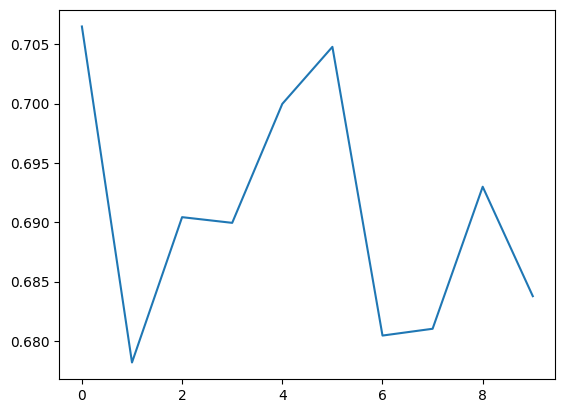

In [86]:
plt.plot (iteration, losses)

In [67]:
correct = 0
total = 0
with torch.no_grad ():
    ix = torch.randint (0, X_train.shape[0], (64,))
    inputs = X_train[ix]
    y_true = y_train[ix].to (torch.float)

    y_pred = torch.sigmoid (model (inputs))
    y_pred = y_pred = (y_pred >= 0.5).float ()
    
    total += inputs.shape[0]
    correct += (y_pred == y_true).sum ().item ()

In [68]:
correct / total

32.0